# **Лабораторна робота 5: Використання Boosting моделей для прогнозування**
**Всі завдання виконуються індивідуально. Використання запозиченого коду буде оцінюватись в 0 балів.**

**Лабораторні роботи де в коді буде використаня КИРИЛИЦІ будуть оцінюватись в 20 балів.**

#### **Мета роботи:**
Ознайомитись з принципами роботи Boosting моделей, навчитися застосовувати три різні Boosting алгоритми (AdaBoost, Gradient Boosting, XGBoost) для розв'язання задач прогнозування, налаштовувати параметри моделей, зокрема параметри регуляризації, для підвищення їх продуктивності.

#### **Завдання:**

1. **Підготовка даних**:
   - Завантажте та підготуйте датасет для регресії або класифікації: (наприклад, **[дані про ціни на житло](https://)** або **[діабет](https://www.kaggle.com/datasets/pkdarabi/diabetes-dataset-with-18-features)**). Розбийте дані на навчальну та тестову вибірки (наприклад, 80/20).
   
2. **Побудова трьох Boosting моделей**:
   - **AdaBoost**: Побудуйте модель на базі дерев рішень як базових моделей.
   - **Gradient Boosting**: Використайте бібліотеку Scikit-learn для створення Gradient Boosting моделі для прогнозування.
   - **XGBoost**: Використайте бібліотеку XGBoost для побудови більш оптимізованої моделі.

3. **Навчання та оцінка моделей**:
   - Для кожної моделі виведіть метрики оцінки, такі як точність (classification accuracy) або середньоквадратична помилка (MSE) для регресії.
   - Побудуйте графіки навчання для візуалізації процесу.

4. **Тонке налаштування параметрів (Hyperparameter Tuning)**:
   - Для кожної моделі налаштуйте наступні параметри:
     - **AdaBoost**: Кількість базових моделей (n_estimators), learning_rate.
     - **Gradient Boosting**: Максимальна глибина дерев (max_depth), кількість дерев (n_estimators), learning_rate.
     - **XGBoost**: Кількість дерев (n_estimators), learning_rate, max_depth, subsample.
   - Використайте крос-валідацію для підбору оптимальних параметрів.

5. **Регуляризація**:
   - Додайте **L1 та L2 регуляризацію** для Gradient Boosting та XGBoost моделей (в XGBoost параметри `alpha` для L1 та `lambda` для L2).
   - Виведіть результати з регуляризацією і порівняйте з результатами без регуляризації.

6. **Порівняння моделей**:
   - Проведіть порівняння трьох моделей за основними метриками продуктивності на тестових даних.
   - Проаналізуйте, як регуляризація впливає на результати моделей. В яких випадках вона покращує модель, а в яких — погіршує.

7. **Захист роботи**:
   - Поясніть, яку модель і чому ви вважаєте найкращою для вирішення вашої задачі.
   - Опишіть, як впливала регуляризація на продуктивність моделей, та що б ви змінили в параметрах для кращого результату.

#### **Додаткові вимоги:**
- Забезпечити відображення важливості ознак у кожній з моделей (feature importance).
- Побудувати графіки для візуалізації залежності продуктивності від зміни гіперпараметрів (наприклад, залежність від кількості дерев або learning_rate).


#### **Додаткові набори даних:**

1. **Diabetes Dataset** — містить медичні дані пацієнтів, які можуть бути використані для прогнозування наявності діабету. Він доступний за посиланням: [Diabetes Dataset](https://www.kaggle.com/datasets/mathchi/diabetes-data-set).

2. **Diabetes Health Indicators Dataset** — великий датасет з понад 250 тисячами записів, який містить індикатори здоров'я для визначення ризику діабету. Підходить для класифікаційних задач. Доступний за посиланням: [Diabetes Health Indicators Dataset](https://www.kaggle.com/datasets/alexteboul/diabetes-health-indicators-dataset).

3. **California Housing Prices** — датасет, що містить інформацію про ціни на житло у різних округах штату Каліфорнія, включаючи такі параметри, як середній дохід домогосподарств, кількість мешканців тощо. Він добре підходить для регресійних моделей. Доступний за посиланням: [California Housing Prices](https://www.kaggle.com/datasets/camnugent/california-housing-prices).

4. **House Prices - Advanced Regression Techniques** — більш комплексний датасет, який використовується для вдосконалення регресійних моделей. Включає більше 70 ознак, що описують різні аспекти нерухомості, ідеальний для глибокого аналізу та тонкого налаштування моделей. Доступний тут: [House Prices - Advanced Regression Techniques](https://www.kaggle.com/c/house-prices-advanced-regression-techniques).

Ці набори даних ви також можете використовувати для виконання завдань Лабораторної роботи 5.

In [ ]:
import pandas as pd
import numpy as np
import xgboost as xgb
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import learning_curve
from sklearn.model_selection import GridSearchCV

In [51]:
data = pd.read_csv('diabetes.csv') 

X = data.drop('Diabetes', axis=1)
y = data['Diabetes']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [52]:
ada_model = AdaBoostClassifier(
    estimator=DecisionTreeClassifier(max_depth=1),
    n_estimators=50,
    learning_rate=1.0,
    algorithm='SAMME', 
    random_state=42
)

In [53]:
gb_model = GradientBoostingClassifier(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=3,
    random_state=42
)

In [54]:
xgb_model = xgb.XGBClassifier(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=3,
    subsample=1,
    random_state=42
)

In [55]:
ada_model.fit(X_train, y_train)
gb_model.fit(X_train, y_train)
xgb_model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

In [56]:
ada_pred = ada_model.predict(X_test)
gb_pred = gb_model.predict(X_test)
xgb_pred = xgb_model.predict(X_test)

ada_accuracy = accuracy_score(y_test, ada_pred)
gb_accuracy = accuracy_score(y_test, gb_pred)
xgb_accuracy = accuracy_score(y_test, xgb_pred)

print(f"AdaBoost Accuracy: {ada_accuracy:.4f}")
print(f"Gradient Boosting Accuracy: {gb_accuracy:.4f}")
print(f"XGBoost Accuracy: {xgb_accuracy:.4f}")

AdaBoost Accuracy: 0.9419
Gradient Boosting Accuracy: 0.9443
XGBoost Accuracy: 0.9431


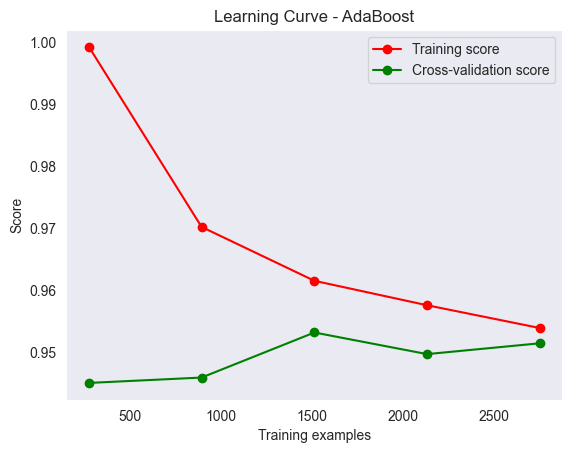

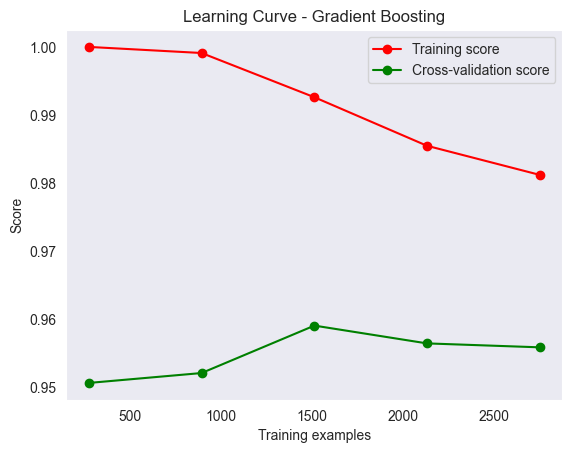

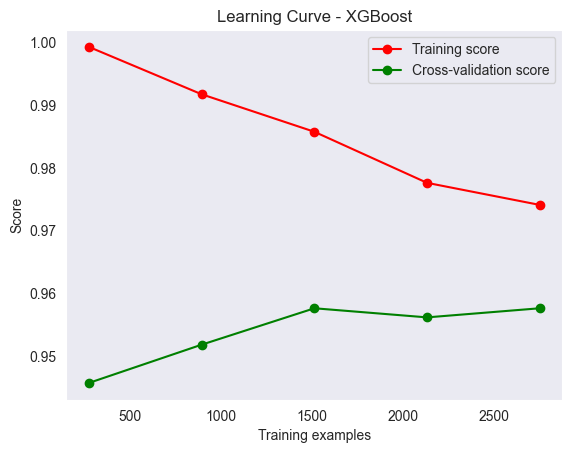

In [57]:
def plot_learning_curve(estimator, title):
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X_train, y_train, cv=5, n_jobs=-1, train_sizes=np.linspace(.1, 1.0, 5)
    )
    train_scores_mean = np.mean(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)

    plt.figure()
    plt.title(title)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    plt.grid()

    plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")

    plt.legend(loc="best")
    plt.show()

plot_learning_curve(ada_model, "Learning Curve - AdaBoost")
plot_learning_curve(gb_model, "Learning Curve - Gradient Boosting")
plot_learning_curve(xgb_model, "Learning Curve - XGBoost")

In [58]:
ada_param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 1],
    'algorithm': ['SAMME']  
}

ada_classifier = AdaBoostClassifier(
    estimator=DecisionTreeClassifier(max_depth=1),
    algorithm='SAMME', 
    random_state=42
)

ada_grid = GridSearchCV(
    ada_classifier,
    param_grid=ada_param_grid,
    cv=5,
    n_jobs=-1
)

ada_grid.fit(X_train, y_train)

print(f"Best parameters for AdaBoost: {ada_grid.best_params_}")

Best parameters for AdaBoost: {'algorithm': 'SAMME', 'learning_rate': 1, 'n_estimators': 100}


In [59]:
gb_param_grid = {
    'n_estimators': [100, 200],
    'learning_rate': [0.01, 0.1],
    'max_depth': [3, 5]
}

gb_grid = GridSearchCV(GradientBoostingClassifier(random_state=42), gb_param_grid, cv=5, n_jobs=-1)
gb_grid.fit(X_train, y_train)

print(f"Best parameters for Gradient Boosting: {gb_grid.best_params_}")

Best parameters for Gradient Boosting: {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 200}


In [60]:
xgb_param_grid = {
    'n_estimators': [100, 200],
    'learning_rate': [0.01, 0.1],
    'max_depth': [3, 5],
    'subsample': [0.8, 1]
}

xgb_grid = GridSearchCV(xgb.XGBClassifier(random_state=42), xgb_param_grid, cv=5, n_jobs=-1)
xgb_grid.fit(X_train, y_train)

print(f"Best parameters for XGBoost: {xgb_grid.best_params_}")

Best parameters for XGBoost: {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 200, 'subsample': 0.8}


In [61]:
gb_reg_model = GradientBoostingClassifier(
    n_estimators=gb_grid.best_params_['n_estimators'],
    learning_rate=gb_grid.best_params_['learning_rate'],
    max_depth=gb_grid.best_params_['max_depth'],
    min_samples_leaf=5,
    random_state=42
)

gb_reg_model.fit(X_train, y_train)
gb_reg_pred = gb_reg_model.predict(X_test)
gb_reg_accuracy = accuracy_score(y_test, gb_reg_pred)
print(f"Gradient Boosting with regularization Accuracy: {gb_reg_accuracy:.4f}")

Gradient Boosting with regularization Accuracy: 0.9431


In [62]:
xgb_reg_model = xgb.XGBClassifier(
    n_estimators=xgb_grid.best_params_['n_estimators'],
    learning_rate=xgb_grid.best_params_['learning_rate'],
    max_depth=xgb_grid.best_params_['max_depth'],
    subsample=xgb_grid.best_params_['subsample'],
    reg_alpha=0.1, 
    reg_lambda=1,
    random_state=42
)

xgb_reg_model.fit(X_train, y_train)
xgb_reg_pred = xgb_reg_model.predict(X_test)
xgb_reg_accuracy = accuracy_score(y_test, xgb_reg_pred)

print(f"XGBoost with regularization Accuracy: {xgb_reg_accuracy:.4f}")

XGBoost with regularization Accuracy: 0.9443


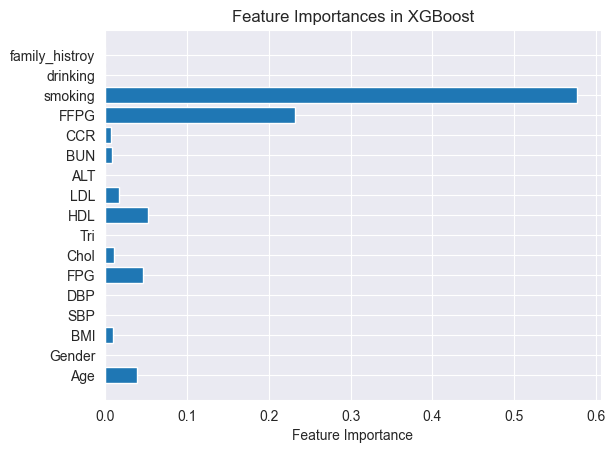

In [63]:
xgb_feature_importances = xgb_reg_model.feature_importances_

plt.barh(X.columns, xgb_feature_importances)
plt.xlabel("Feature Importance")
plt.title("Feature Importances in XGBoost")
plt.show()

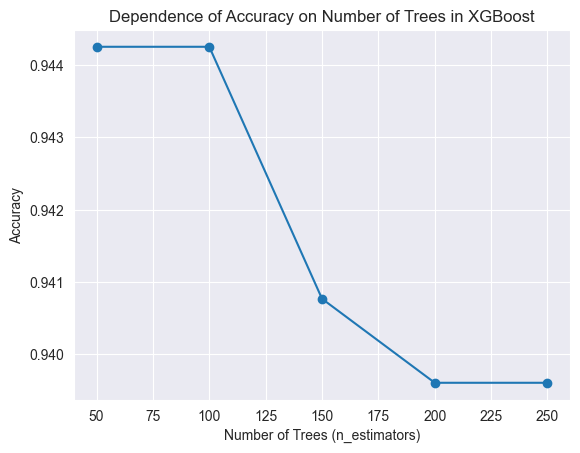

In [64]:
estimators_range = [50, 100, 150, 200, 250]
accuracy_scores = []

for n in estimators_range:
    model = xgb.XGBClassifier(n_estimators=n, learning_rate=0.1, max_depth=5, subsample=0.8, random_state=42)
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    accuracy = accuracy_score(y_test, preds)
    accuracy_scores.append(accuracy)

plt.plot(estimators_range, accuracy_scores, marker='o')
plt.xlabel('Number of Trees (n_estimators)')
plt.ylabel('Accuracy')
plt.title('Dependence of Accuracy on Number of Trees in XGBoost')
plt.show()